# Домашнее задание (линейная регрессия)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
np.random.seed(27)
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])

In [9]:
def calc_mse(y, y_pred):
    return np.mean((y - y_pred)**2)


### Задание: 
Подберите скорость обучения (alpha) и количество итераций для градиентного спуска. 

Воспользуемя градиентным спуском для вычисления весов:
$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$

формула вычисления градиента для MSE принимает вид

$$\nabla_{w}Q(w,X) = \frac{2}{n}X^{T}(Xw-y).$$

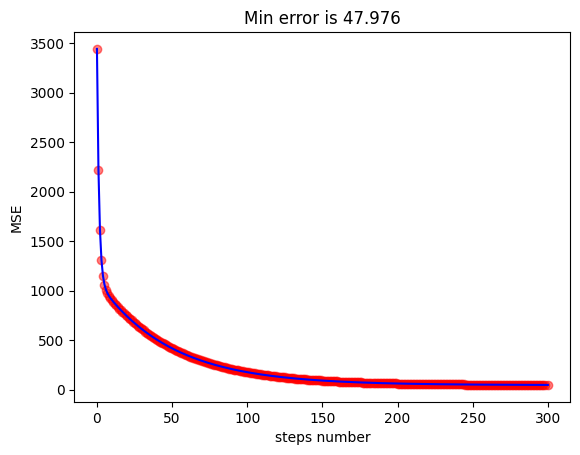

In [10]:
def linear_regression_fit(X:np.array, 
                          y:np.array, 
                          steps_number=300, 
                          eta=0.01,
                          visualization=False):
    
    n, errors = X.shape[1], list()
    W = np.random.normal(scale=0.5, size=X.shape[0])
    
    for i in range(steps_number):
        y_pred = np.dot(W, X)
        errors.append(calc_mse(y, y_pred))
        W -= (eta * (2 / n  * np.dot(X, (y_pred - y))))
    
    if visualization:
        x = np.linspace(0, steps_number, steps_number, dtype=int)
        plt.scatter(x, errors, c='red', alpha=0.5)
        plt.plot(x, errors, c='blue')
        plt.xlabel('steps number')
        plt.ylabel('MSE')
        plt.title(f'Min error is {round(errors[-1], 3)}')
        plt.show()
    return W

W = linear_regression_fit(X, y, visualization=True, steps_number=300)

В данной модели скорость обучения задает точность расчета весов.

Перепишем решение данной задачи, но без использования количества итераций для градиентного спуска, а с использованием условия сходимости $$||w^{k}-w^{k-1}|| < \varepsilon.$$ 

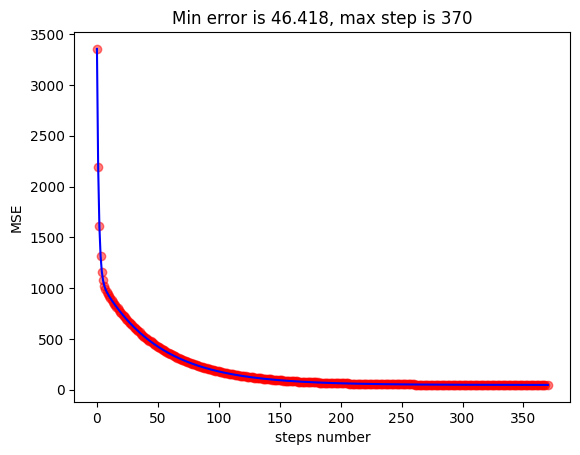

In [11]:
def linear_regression_fit_2(X:np.array, 
                          y:np.array, 
                          precision=0.01,
                          eta=0.01,
                          visualization=False):
    
    n, errors, steps_number = X.shape[1], list(), 0 
    w_new = np.random.normal(scale=0.5, size=X.shape[0])
    
    while True: 
        steps_number += 1
        w = w_new
        y_pred = np.dot(w, X)
        errors.append(calc_mse(y, y_pred))
        w_new = w - (eta * (2 / n  * np.dot(X, (y_pred - y))))
        if np.linalg.norm(w - w_new, ord=2) < precision:
            break
        
    if visualization:
        x = np.linspace(0, steps_number, steps_number, dtype=int)
        plt.scatter(x, errors, c='red', alpha=0.5)
        plt.plot(x, errors, c='blue')
        plt.xlabel('steps number')
        plt.ylabel('MSE')
        plt.title(f'Min error is {round(errors[-1], 3)}, max step is {steps_number}')
        plt.show()
    return w_new, errors[-1], steps_number

W, _, _ = linear_regression_fit_2(X, y, visualization=True)

Теперь мы можем подобрать оптимальную скорость обучения

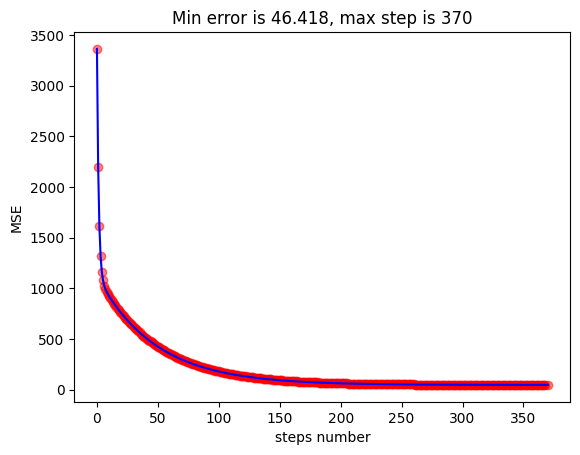

(array([46.29645249,  4.08349667]), 46.4181361792372, 370)

In [52]:
linear_regression_fit_2.__call__(*(X, y), **{'visualization': True})

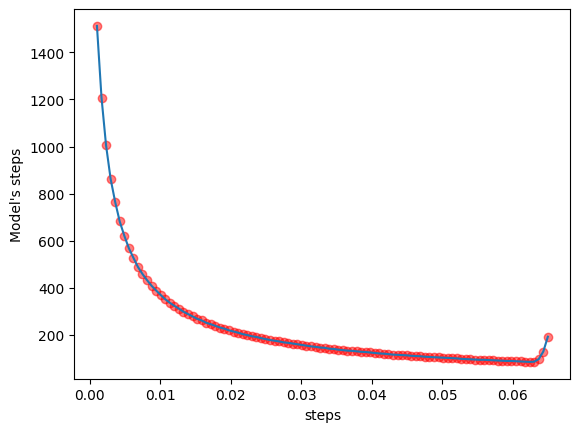

In [65]:
def get_optimal_stemps(X, y, model, steps_param, start_step=0.001, end_step=0.065):
    steps = np.linspace(start_step, end_step, 100)
    count_model_steps = list()
    
    for i in range(steps.shape[0]):
        w, err, model_steps = model.__call__(*(X, y), **{steps_param: steps[i]})
        count_model_steps.append(model_steps)

    plt.plot(steps, count_model_steps)
    plt.scatter(steps, count_model_steps, c='red', alpha=0.5)
    plt.xlabel('steps')
    plt.ylabel("Model's steps")
    plt.show()
    
get_optimal_stemps(X, y, model=linear_regression_fit_2, steps_param='eta')

Видно, что минимум в районе 0.062

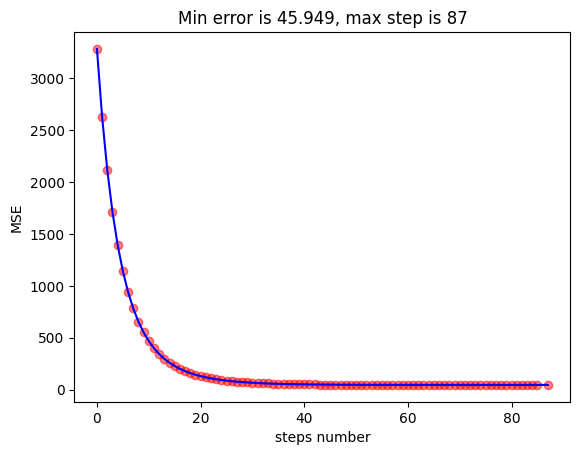

In [55]:
W, _, _ = linear_regression_fit_2(X, y, eta=0.062, visualization=True)

Продолжим улучшать модель добавив динамическое уменьшение скорости. Это означает, что алгоритм сам будет выбирать скорость спуска

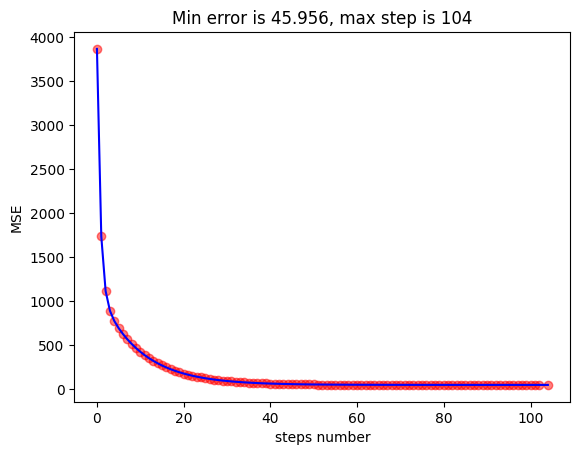

In [56]:
def linear_regression_fit_3(X:np.array, 
                            y:np.array, 
                            precision=0.01,
                            speed_divider=10,
                            start_speed_lr=0.05,
                            visualization=False):
    
    n, errors, steps_number = X.shape[1], list(), 0 
    w_new = np.random.normal(scale=0.5, size=X.shape[0])
    
    eta = start_speed_lr
    while True: 
        steps_number += 1
        w = w_new
        y_pred = np.dot(w, X)
        errors.append(calc_mse(y, y_pred))
        w_new = w - (eta * (2 / n  * np.dot(X, (y_pred - y))))
        if np.linalg.norm(w - w_new, ord=2) < precision:
            break
        new_error = calc_mse(y, np.dot(w_new, X)) 
        eta = eta if new_error < errors[-1] else eta / speed_divider
    
    if visualization:
        x = np.linspace(0, steps_number, steps_number, dtype=int)
        plt.scatter(x, errors, c='red', alpha=0.5)
        plt.plot(x, errors, c='blue')
        plt.xlabel('steps number')
        plt.ylabel('MSE')
        plt.title(f'Min error is {round(errors[-1], 3)}, max step is {steps_number}')
        plt.show()
    return w_new, errors[-1], steps_number

W = linear_regression_fit_3(X, y, visualization=True)

Теперь мы можем настроить гиперпараметр "начальная скорость обучения". В зависимости от количества шагов необходимых для настройки поиска рещения

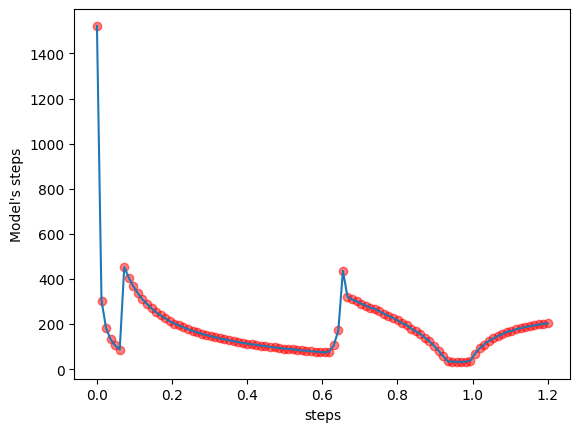

In [97]:
get_optimal_stemps(X, y, 
                   model=linear_regression_fit_3, 
                   steps_param='start_speed_lr', 
                   start_step=0.001, end_step=1.2)


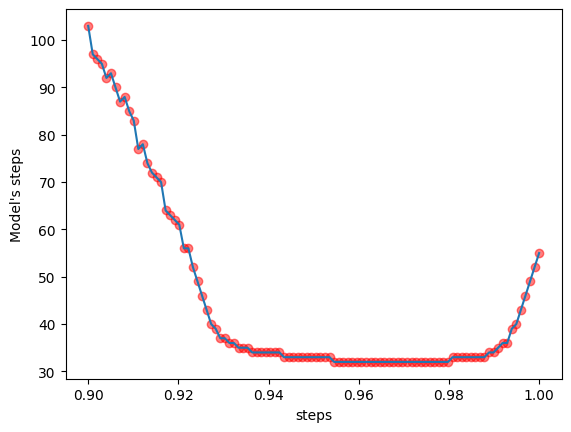

In [98]:
get_optimal_stemps(X, y, 
                   model=linear_regression_fit_3, 
                   steps_param='start_speed_lr', 
                   start_step=0.9, end_step=1)

Видно, что если выбрать в качестве начального шага значение 0.96 то модель обучиться за наименьшее число шагов

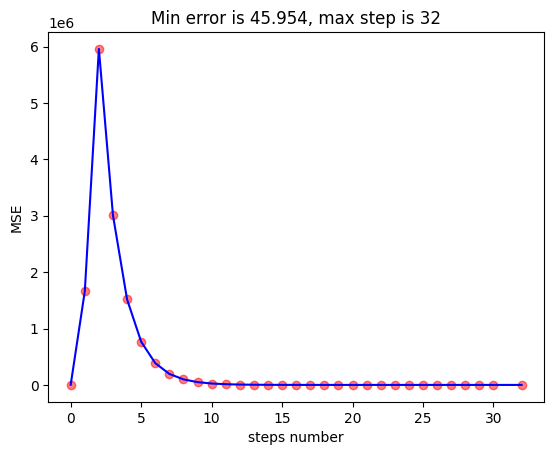

In [99]:
W, err, _ = linear_regression_fit_3(X, y, start_speed_lr=0.96,visualization=True)

Из графика выше выдно, что сначало модель совершает больше ошибкок, а затем ошибка значительно уменьшается. Следовательно, для большей оптимизации необходимо уменьшить шаг 

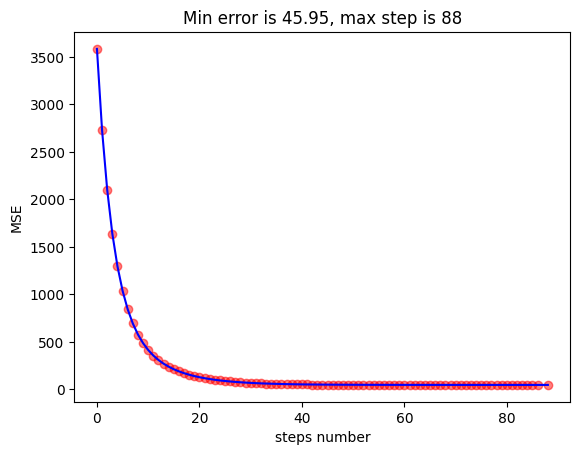

In [108]:
W, err, _ = linear_regression_fit_3(X, y, start_speed_lr=0.061,visualization=True)

После оптимизации видно, что количество шагов увеличилось в 2 раза. Странный эффект

Сравним скорости трех моделей с подобранными гиперпараметрами

In [109]:
%%timeit 
W = linear_regression_fit(X, y, steps_number=300)

8.17 ms ± 176 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [110]:
%%timeit 
W, _, _ = linear_regression_fit_2(X, y, eta=0.062)

2.91 ms ± 84 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [111]:
%%timeit 
W, err, _ = linear_regression_fit_3(X, y, start_speed_lr=0.95)

1.6 ms ± 46.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


При условии, что MSE у всех трех моделей примерно одинаковая, самая быстрая модель оказалась модель №3. Построим график восстановленной функции  

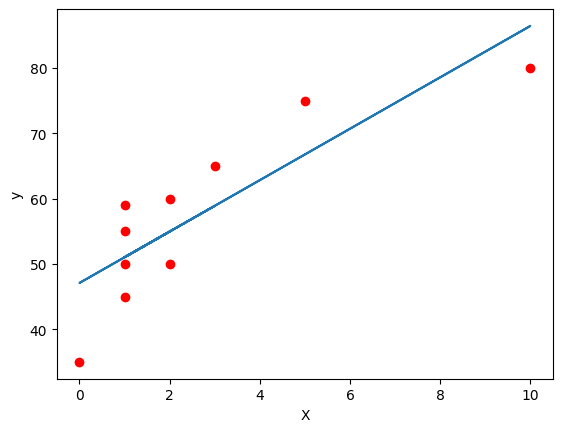

In [112]:
plt.scatter(X[1], y, c='red')
plt.plot(X[1], W.dot(X))
plt.xlabel('X')
plt.ylabel('y')
plt.show()